<a href="https://colab.research.google.com/github/ixora99/NewsClassify/blob/master/project_2019_05_22_02v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import gensim 
import sys


from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
'''
실행에 필요한 관련 모듈을 불러온다.
'''

!git clone https://github.com/ixora99/NewsClassify.git #깃허브에서 트레이닝 할 뉴스 자료를 불러온다



fatal: destination path 'NewsClassify' already exists and is not an empty directory.


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [0]:
with open("NewsClassify/resource/test.csv", encoding='utf-8') as file1:
  line = file1.readline()
  test_news=[]
  test_class=[]
  while line:

    test_class.append(int(line[1]))
    test_news.append(gensim.utils.simple_preprocess(line[2:]))
    line = file1.readline()


In [0]:
'''
해당 분류의 높은 빈도 단어를 찾아 지정한 키워드
'''

key_world = ['president','nuclear','people','government']
key_sports = ['game','player','olympic','team']
key_business = ['business', 'market', 'company', 'government']
key_sci = ['world','users','technology','computer']


In [0]:
class classify:
  '''
  해당되는 분류에 따라 단어들을 벡터로 바꾸는 객체를 생성하는 클래스
  '''
  def __init__(self,category,keys):
    '''
    객체를 생성 할 때 동작(단어를 벡터로 바꾼다)
    '''
    text = []
    with open("NewsClassify/resource/train.csv", encoding='utf-8') as file:
        line = file.readline()
        while line:
            if int(line[0]) == int(category):
                text.append(gensim.utils.simple_preprocess(line[2:]))
            line = file.readline()

    model = gensim.models.Word2Vec (text, size=10, window=10, min_count=2, workers=4)
    model.train(text, total_examples=len(text), epochs=100)
    self.model=model
    self.keys=keys
    
    ###단어수 저장
    ''' 
    wordlist = []
    count = []
    word_num=dict()
    
    for word, obj in model.wv.vocab.items():
        wordlist.append(word)
        count.append(obj.count)
    for _ in range(100):
        idx = count.index(max(count))
        word_num[wordlist[idx]]=max(count)
        del count[idx]
        del wordlist[idx]
    self.word_num=word_num
    '''


  def make_plot(self, title, a, filename=None):
    '''
    단어 분포 그래프 만드는 함수
    '''
    model=self.model
    keys=self.keys
    labels=self.keys
    
    embedding_clusters = []
    word_clusters = []
    for word in keys:
        embeddings = []
        words = []
        for similar_word, _ in model.wv.most_similar(word, topn=50):
            words.append(similar_word)
            embeddings.append(model.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

        
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
    
    
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embeddings_en_2d, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha = a, label = label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    return None
  
  
  def wordlist(self):
    '''
    단어 빈도수 계산
    '''
    model=self.model
    
    wordlist = []
    count = []
    for word, obj in model.wv.vocab.items():
        wordlist.append(word)
        count.append(obj.count)
    for _ in range(100):
        idx = count.index(max(count))
        print(wordlist[idx], max(count))
        del count[idx]
        del wordlist[idx]
        
    return None
  
  



    

In [0]:
'''
객체 생성
'''
class_world = classify(1,key_world)
class_sports=classify(2,key_sports)
class_business = classify(3,key_business)
class_sci=classify(4,key_sci)

all_keys=[key_world,key_sports,key_business,key_sci]
all_classes=[class_world,class_sports,class_business,class_sci]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


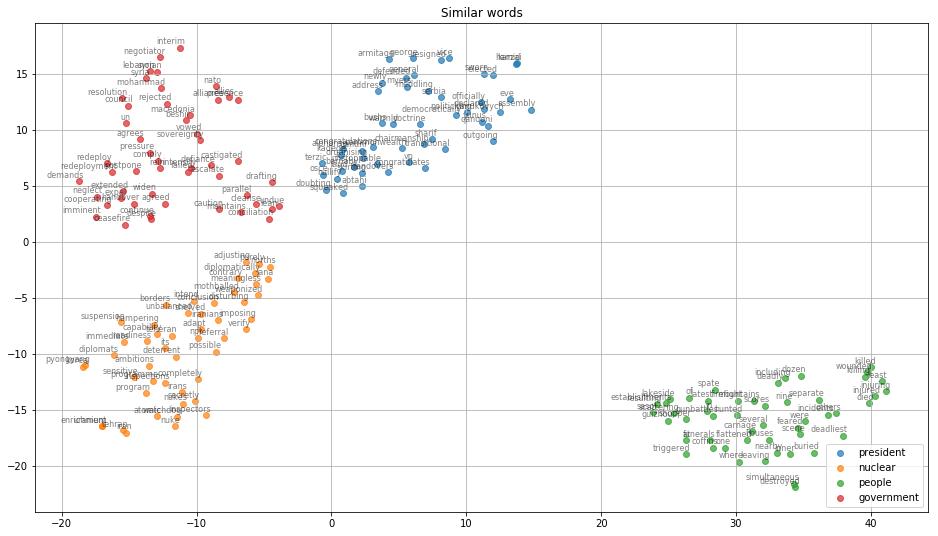

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


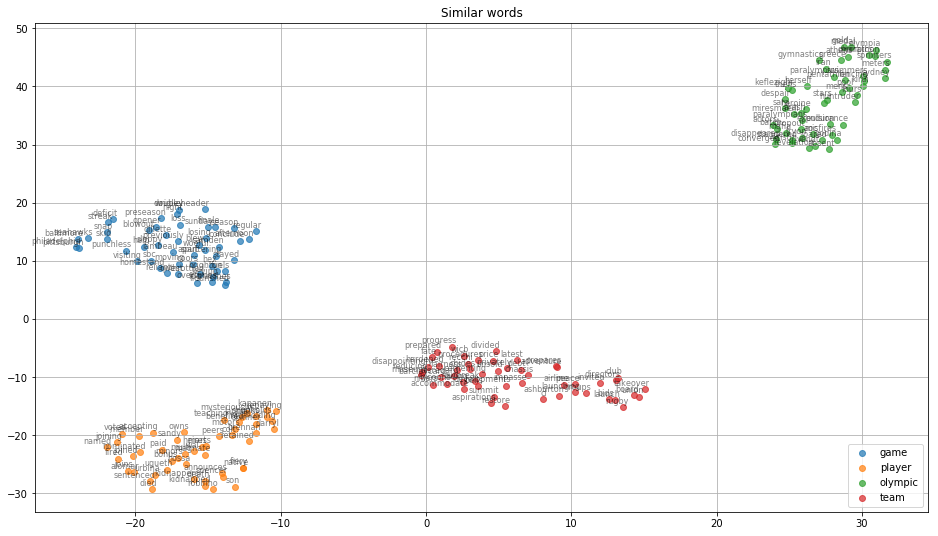

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


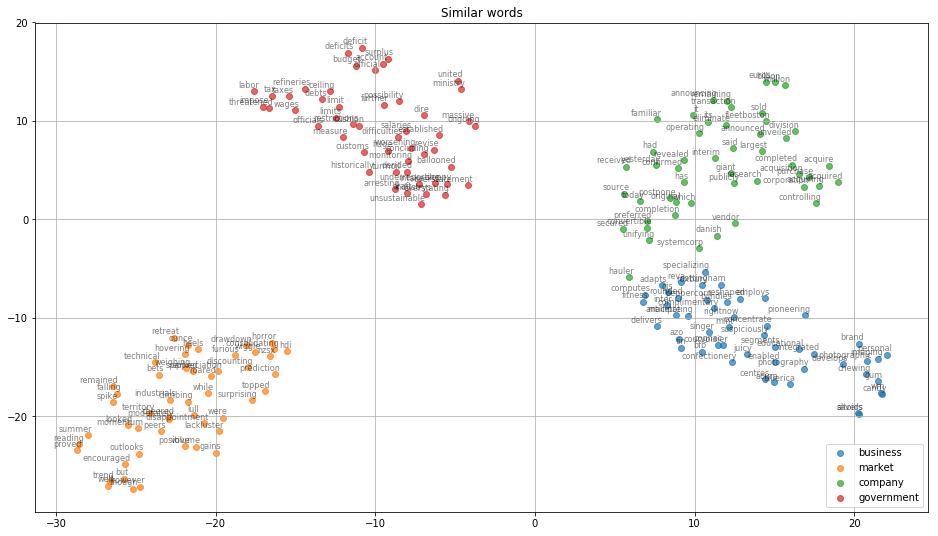

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


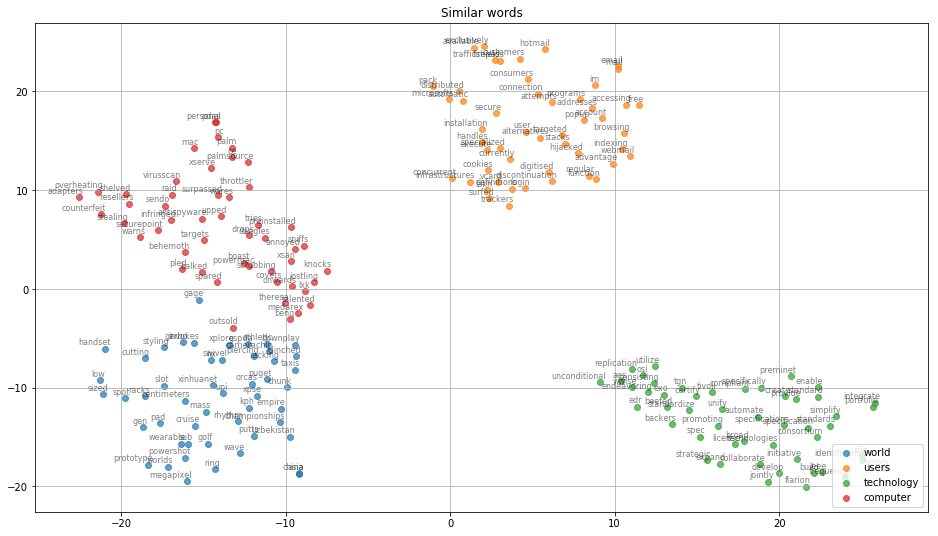

In [31]:
'''
그래프 그리기
'''
class_world.make_plot('Similar words',0.7,'similar_words.png')
class_sports.make_plot('Similar words',0.7,'similar_words1.png')
class_business.make_plot('Similar words',0.7,'similar_words2.png')
class_sci.make_plot('Similar words',0.7,'similar_words3.png')

In [32]:
'''
단어수
'''
class_world.wordlist()
class_sports.wordlist()
class_business.wordlist()
class_sci.wordlist()

the 49039
in 32216
to 31138
of 28982
and 17655
on 16208
for 11638
said 7745
that 6805
at 6271
as 6232
with 6064
iraq 5837
ap 5787
an 5677
by 5511
reuters 5423
his 4883
from 4684
has 4596
was 4459
after 4361
is 4352
president 4306
us 4133
two 3589
new 3479
afp 3388
minister 3351
it 3223
killed 3179
its 3136
have 3114
people 2873
over 2852
be 2715
government 2670
bush 2624
were 2579
quot 2578
he 2561
their 2481
iraqi 2467
will 2426
prime 2380
more 2288
baghdad 2261
lt 2235
gt 2235
are 2208
monday 2174
who 2173
security 2124
wednesday 2098
police 2075
thursday 2054
says 2033
nuclear 2012
friday 2010
up 2004
tuesday 1984
three 1969
palestinian 1968
officials 1967
but 1956
leader 1944
sunday 1939
election 1925
military 1918
un 1889
talks 1888
yesterday 1871
not 1870
united 1870
israeli 1801
gaza 1794
troops 1766
one 1736
into 1732
country 1721
war 1715
al 1711
been 1699
least 1686
first 1683
out 1656
iran 1645
against 1639
city 1626
year 1623
saturday 1555
peace 1544
british 1517
china 1515

In [33]:
def test2(text):
  
  exclude=['the','in','to','of','and','on','for','that','at','as','with','ap','an','by','reuters','his','from','has','was','is','its'] #의미 없이 많은 빈도를 가지는 단어
  
  text=gensim.utils.simple_preprocess(text)
  
  
  list_0=[]
  for keys,classes in zip(all_keys,all_classes):
    word_list=list(classes.model.wv.vocab.keys())
    
    
    count=0
    word_count=0
    for word in text:
      if word in word_list:
        word_vector=classes.model.wv[word]
      
        
        list_1=[]
        for key in keys:
          key_vector=classes.model.wv[key]
          result= (np.dot(word_vector, key_vector) / np.linalg.norm(word_vector) / np.linalg.norm(key_vector))
          list_1.append(result)
        aaa=max(list_1)
        list_1.remove(max(list_1))
        for i in range(len(list_1)):
          aaa-=(abs(list_1[i]))
          
        count+=aaa
        word_count+=1
    if word_count!=0:
      list_0.append(count/word_count)
  class_count = 1
  
  print(list_0)
  
    
  for iii in list_0:
    if iii==max(list_0):
      '''
      print('분류한 분류는',class_count,'입니다','정답은',test_class[int(number)])
      '''
      return class_count
    class_count+=1
    
print(test2("Here’s a downer: Pessimism seems contagious among ravens. But positivity? Not so much. When ravens saw fellow birds’ responses to a disliked food, but not the food itself, their interest in their own food options waned, researchers report May 20 in the Proceedings of the National Academy of Sciences. The study suggests that the birds pick up on and even share negative emotions, the researchers say. Ravens are 'very good problem solvers … but this paper’s really highlighting their social intelligence as well,' says Andrew Gallup, a psychologist at SUNY Polytechnic Institute in Utica, N.Y., who was not involved in the study. The work paints a richer picture of how the birds’ brains work, he says. Known for their smarts, ravens act in ways that suggest a capacity for empathy, such as by appearing to console a distressed comrade. Thomas Bugnyar, a cognitive ethologist at the University of Vienna, and his colleagues wanted to look into one building block of empathy — whether animals share emotions. To be able to feel for others, an animal needs to be able to feel like others, he says. But sizing up an animal’s mood is tricky. Scientists generally rely on behavioral or physiological cues to clue into a creature’s emotional state. More challenging is assessing how one animal’s mood might influence another’s: Similar actions appearing to stem from kindred emotions may just be mimicry. To tune into the moods of ravens, the researchers set up experiments to watch whether the birds reacted positively or negatively to a neutral stimulus. This so-called cognitive bias test, used on a wide variety of animals from bees to pigs, 'is basically … asking how you would judge a glass — if it’s half full or half empty,' Bugnyar says."))

[-0.3302400557812853, -0.3085624470491394, -0.2507701168286661, -0.460445944461142]
3


In [34]:
def test(number):   # 트레이닝의 정확도 판별
  
  exclude=['us','said','from','says','as','will','after','the','in','to','of','and','on','for','that','at','as','with','ap','an','by','reuters','his','from','has','was','is','its'] #의미 없이 많은 빈도를 가지는 단어
  '''
  제외 시켜 봤는데 제외 시키는 경우에 오히려 정확도가 낮아져서 보류
  '''
  
  
  
  list_0=[]
  for keys,classes in zip(all_keys,all_classes):
    word_list=list(classes.model.wv.vocab.keys())
    
    
    count=0
    word_count=0
    for word in test_news[int(number)]:
      if word in word_list:
        word_vector=classes.model.wv[word]
      
        
        list_1=[]
        for key in keys:
          key_vector=classes.model.wv[key]
          result= (np.dot(word_vector, key_vector) / np.linalg.norm(word_vector) / np.linalg.norm(key_vector))
          list_1.append(result)
        aaa=max(list_1)
        list_1.remove(max(list_1))
        for i in range(len(list_1)):
          aaa-=(1/4.315)*(abs(list_1[i]))
          
        count+=aaa
        word_count+=1
    if word_count!=0:
      list_0.append(count/word_count)
  class_count = 1
  '''
  print(list_0)
  '''
    
  for iii in list_0:
    if iii==max(list_0):
      '''
      print('분류한 분류는',class_count,'입니다','정답은',test_class[int(number)])
      '''
      return class_count
    class_count+=1
    
    
    
    

          
      
    
      
      
  

          

      

    
    
ac=0
for i in range(1000):
  aaa=test(i)
  
  
  if aaa==test_class[i]:
    ac+=1
print(ac/1000)

0.517
